# Aula 02 - Parte 02

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# Exercício 1
**Objetivo: entender o sistema presa-predador linear**

Uma situação que acontece na natureza é que alguns seres vivos são predadores de outros. Por exemplo: o [carcará](https://pt.wikipedia.org/wiki/Carcar%C3%A1), uma ave de rapina sul-americana parecida com um falcão, se alimenta de sapos, e, por isso, dizemos que o carcará é um *predador* do sapo. Nessa relação, o carcará é o *predador* e o sapo é a *presa*. Nosso objetivo, neste exercício, é encontrar como a quantidade de carcarás e de sapos varia com o tempo.

Na nossa simulação, o tempo é medido em meses (veja que $t$ será sempre um número inteiro!). Vamos usar a variável $c$ para representar o número de carcarás na população, e $s$ para representar o número de sapos. Então, $c_t$ é o número de carcarás no tempo $t$, e $s_t$ é o número de sapos no tempo $t$. Como cada carcará come muitos sapos, vamos convencionar que $c$ está em unidades e $s$ está em milhares.

Vamos assumir alguns comportamentos 

* A população de carcarás naturalmente cai em 20% a cada mês
* Para cada cinco mil sapos existentes naquele mês, um novo carcará nasce
* A população de sapos naturalmente sobe em 10% porque eles se reproduzem
* A cada mês, cada carcará consegue comer 100 sapos

Isso significa que podemos escrever equações para calcular o número de carcarás e de sapos a cada mês, tomando por base a quantidade deles no mês anterior:

$$ 
\begin{cases}
    \begin{aligned}
    c_t & = 0.8 c_{t-1} + 0.2 s_{t-1} \\
    s_t & = - 0.1 c_{t-1} + 1.1 s_{t-1} \\
    \end{aligned}
\end{cases}
$$

1. Complete a função abaixo para simular a mudança populacional a cada mês por um período de 10 anos
2. Simule a mudança populacional para as as condições iniciais: $(c_0=10, s_0=100)$, $(c_0=6, s_0=5)$, $(c_0=10.3, s_0=10.3)$, $(c_0=10, s_0=10)$. O que acontece em cada um desses casos?
3. O que acontece com as populações se os gaviões começarem a comer mais e mais?
4. O que acontece com as populações se os sapos passarem a se reproduzir menos?

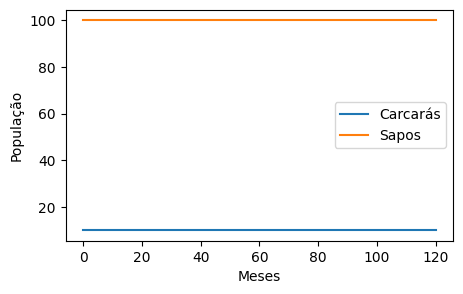

In [12]:

def executar_modelo(c, s, meses=120):
    # Faça sua função aqui, implementando as equações do sistema!
    # Corrija a função onde for adequado
    c_mes_passado = c
    s_mes_passado = s
    c_list = [c]
    s_list = [s]
    for i in range(meses):
        c_este_mes = c_mes_passado
        s_este_mes = s_mes_passado
        c_list.append(c_este_mes)
        s_list.append(s_este_mes)
        
    return c_list, s_list


c_list, s_list = executar_modelo(c=10, s=100, meses=120)


plt.figure(figsize=(5,3))
plt.plot(c_list, label='Carcarás')
plt.plot(s_list, label='Sapos')
plt.xlabel('Meses')
plt.ylabel('População')
plt.legend()
plt.show()

# Exercício 2
**Objetivo: escrever um sistema dinâmico linear em seu formato matricial**

Uma maneira de escrever o sistema de equações que usamos no exercício anterior é usando a forma matricial:

$$
\begin{bmatrix}
    c_t \\
    s_t 
\end{bmatrix}
=
\begin{bmatrix}
    0.8 & 0.2\\
    -0.1 & 1.1
\end{bmatrix} 
\begin{bmatrix}
    c_{t-1} \\
    s_{t-1}
\end{bmatrix}
$$

1. Realize manualmente o cálculo acima e verifique que essa formulação matricial é equivalente ao sistema de equações
2. Com essa formulação, o cálculo das populações no mês seguinte passa a ser uma multiplicação matricial. Reformule a função `executar_modelo` para que ela opere diretamente com matrizes e vetores. Teste sua nova função para confirmar que tem os mesmos resultados da versão anterior.



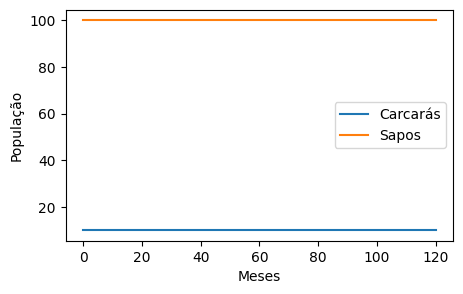

In [13]:

def executar_modelo(c, s, meses=120):
    # Faça sua função aqui, implementando as equações do sistema!
    populacoes_mes_passado = np.array( [[c], [s]] )
    A = np.array([ [0.8, 0.2], [-.1, 1.1]])
    
    c_list = [c]
    s_list = [s]
    for i in range(meses):
        populacao_este_mes = populacoes_mes_passado
        c_list.append(populacao_este_mes[0,0])
        s_list.append(populacao_este_mes[1,0])
        populacoes_mes_passado = populacao_este_mes
        
    return c_list, s_list


c_list, s_list = executar_modelo(c=10, s=100, meses=120)
 

plt.figure(figsize=(5,3))
plt.plot(c_list, label='Carcarás')
plt.plot(s_list, label='Sapos')
plt.xlabel('Meses')
plt.ylabel('População')
plt.legend()
plt.show()

# Exercício 3
**Objetivo: entender o processo de transposição de matrizes**

Você deve ter percebido que na etapa 1 desta aula usamos as linhas de uma matriz para representar cada um dos nossos elementos, ao passo que agora temos colunas representando esses mesmos elementos. Na verdade, podemos optar por qualquer uma das representações, e para isso usamos uma operação chamada "transposição". Na transposição, as linhas de uma matriz se tornam colunas e vice-versa, isto é, se uma matriz $X$ tem elementos $x[i,j]$, então a matriz transposta $X^T$ tem elementos $x^T[i,j] = x[j,i]$. Por exemplo:
$$
X =
\begin{bmatrix}
    a & b & c\\
    d & e & f
\end{bmatrix} \rightarrow
X^T =
\begin{bmatrix}
    a & d\\
    b & e\\
    c & f
\end{bmatrix}
$$

É claro que a transposta da transposta de uma matriz é a própria matriz original:
$$
X^{T^T} = X
$$

A transposição de matrizes tem uma propriedade muito importante, que é a de possibilitar inverter a ordem das matrizes em uma multiplicação:
$$
(AB)^T = B^T A^T
$$

1. Em nossa simulação de carcarás e sapos, utilizamos a forma: $Y=AX$. Identifique as matrizes $Y$, $A$ e $X$.
2. Na representação atual, os elementos de $Y$ são suas colunas. Podemos transpor os dois lados da equação e obter: $Y^T = (AX)^T$. Use as propriedades da transposição de matrizes para simplificar essa equação e permitir que $Y^T$ seja encontrado usando somente uma multiplicação matricial.
3. Altere sua função `executar_modelo` para que ela passe a operar com a forma transposta de seu problema.

# Exercício 4
**Objetivo: Entender o algoritmo PageRank como navegação aleatória e probabilidade**

O buscador Google foi criado com base num algoritmo chamado PageRank. O PageRank tem o objetivo de identificar quais são as páginas web mais relevantes que se relacionam a uma determinada "query". A premissa do PageRank é que as páginas que são linkadas por mais páginas são mais relevantes, e que as páginas que recebem links de páginas relevantes também são mais relevantes. Uma maneira de modelar isso é usando a ideia de um "surfista aleatório": se uma pessoa clica aleatoriamente em links durante sua navegação na Internet, essa pessoa vai passar, com mais probabilidade, em sites relevantes. Daí, a ideia é que a relevância de uma página seja proporcional à probabilidade do surfista estar nessa página ao longo de sua navegação aleatória.

Vamos partir de uma matriz $A$ que representa todas as páginas da web. Como estamos explicando esse conceito, vamos usar primeiro uma "web fictícia" com 4 páginas. O elemento $a_{i,j}$ representa a probabilidade de, clicando num link aleatório da página $j$, sair na página $i$. Isso significa que, se $a_{i,j}=0$, então não há link da página $j$ para a página $i$:

In [9]:
# A[i,j] = probabilidade de chegar na página i vindo da página j
import numpy as np
A = np.array([[0, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0]])
A = A / np.sum(A, axis=0)
print(A)

[[0.         0.5        0.         0.        ]
 [0.33333333 0.         0.5        0.        ]
 [0.33333333 0.         0.         1.        ]
 [0.33333333 0.5        0.5        0.        ]]


1. A matriz $A$ definida acima representa quatro páginas web. Há um link da página $0$ para a página $2$? Há um link da página $2$ para a página $0$?
1. Abaixo, há um código que simula o surfista aleatório. Analise criticamente o código e decida se ele, de fato, está simulando um surfista aleatório. Se for o caso, corrija o que estiver errado.
2. O código dá resultados significativamente diferentes quando o surfista é inicializado em uma outra página que não a $0$?

In [10]:
def randomsurfer_pagerank(A, i_init=0):
    hops = np.zeros(A.shape[0]) # hops[i] = quantas vezes o surfista caiu na página p_i'
    nodes = range(A.shape[0]) # Uma lista com os números das páginas
    i_ = i_init # Em que página o surfista está?
    for _ in range(100000): # Quantos saltos o surfista vai fazer?
        hops[i_] += 1 # Conto uma passagem na página que estou
        possibilities = A[:,i_] # Probabilidades para links que saem da página i_
        next_i = np.random.choice(nodes, p=possibilities) # Escolho a próxima página
        i_ = next_i # Navego para próxima página
    
    hops = hops / np.sum(hops) # Transformo contagens em probabilidades
    return hops

print(randomsurfer_pagerank(A, 0))
print(randomsurfer_pagerank(A, 1))
print(randomsurfer_pagerank(A, 2))

[0.10641 0.21372 0.35807 0.3218 ]
[0.10743 0.21416 0.35706 0.32135]
[0.10744 0.21487 0.35695 0.32074]


# Exercício 5
**Objetivo: Modelar as probabilidades de transição do PageRank em forma matricial**

Podemos interpretar os elementos da matriz $A$ como a probabilidade de ir para a página $i$ sabendo que estamos na página $j$, isto é:
$$
a_{i,j} = P(s_t = i | s_{t-1} = j)
$$

Vamos representar a nossa localização na web através da matriz-coluna $X$. Essa matriz será inicializada com zeros, exceto na posição $0$, que será igual a $1$, significando que estamos na página $0$, isto é:
$$
X =
\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0
\end{bmatrix}
$$

1. Calcule (manualmente) a matriz $Y = AX$. 
2. Qual é a soma dos elementos de $Y$?
3. O que cada elemento da matriz $Y$ significa em termos das probabilidades ligadas ao nosso problema?

# Exercício 6
**Objetivo: Implementar o algoritmo PageRank com multiplicações matriciais**

Nesta seção, faremos uma dedução matemática. Estou acreditando que ela é importante porque esse resultado faz uma ponte entre as probabilidades condicionais e a multiplicação matricial que não está em nenhum livro didático, mas que é usada constantemente em textos de *machine learning*.

Vamos partir do seguinte resultado, ligado à soma de interseções, assumindo que os eventos $C_i$ são disjuntos e a união de todos os eventos $C_i$ cobre $A$ completamente:

$$
P(A) = P(A \cap C_1) + P(A \cap C_2) + .... + P(A \cap C_N),
$$

Usando a definição de probabilidades condicionais, temos:

$$
P(A) = P(A|C_1)P(C_1) + P(A|C_2)P(C_2) + .... + P(A|C_N)P(C_N),
$$

que significa que a probabilidade de um evento é igual à soma de todas as probabilidades desse evento ligadas a diferentes condições, poderadas pelas probabilidades das condições.

Pelo resultado da soma de probabilidades condicionais, podemos calcular a probabilidade de chegar à página $0$, isto é, $P(s_t = 0)$, somando as probabilidades de chegar na página $0$ à partir de cada uma das páginas $j$ e ponderando pelas probabilidades de estar na página $j$ em primeiro lugar, isto é:

$$
P(s_t = 0) = P(s_t = 0 | s_{t-1}=0) P(s_{t-1}=0) + P(s_t = 0 | s_{t-1}=1) P(s_{t-1}=1) + ... + P(s_t = 0 | s_{t-1}=N-1) P(s_{t-1}=N-1)
$$

Podemos generalizar esse resultado para todas as páginas $i$:

$$
P(s_t = i) = P(s_t = i | s_{t-1}=0) P(s_{t-1}=0) + P(s_t = i | s_{t-1}=1) P(s_{t-1}=1) + ... + P(s_t = i | s_{t-1}=N-1) P(s_{t-1}=N-1)
$$

Essa expressão pode ser reduzida para uma somatória:

$$
P(s_t = i) = \sum_{j=0}^ {N-1}  P(s_t = i | s_{t-1}=j) P(s_{t-1}=j).
$$

Porém, construímos nossa matriz $A$ de forma que $a[i,j]=P(s_t = i | s_{t-1}=j)$, e nossa matriz-coluna $X$ é tal que $x[j,0] = P(s_{t-1}=j)$, então temos:

$$
P(s_t = i) =  \sum_{j=0}^ {N-1} a[i,j] x[j, 0].
$$

Se representarmos nossas probabilidades $P(s_t=i)$ numa matriz $Y$, passamos a ter:
$$
\boldsymbol{Y}  =   \sum_{j=0}^ {N-1} a[i,j] x[j, 0].
$$

A expressão à direita dessa equação é uma multiplicação matricial:
$$
\boldsymbol{Y}  =  \boldsymbol{A} \boldsymbol{X}.
$$

E, portanto, "dar um passo" em nosso navegador probabilístico significa multiplicar nossa matriz de probabilidades atual pela matriz $A$.

Tendo em vista esta dedução,
1. Implemente o algoritmo PageRank usando multiplicações matriciais.
2. Compare o resultado com aquele encontrado usando o navegador aleatório.


In [11]:
# Escreva sua solução aqui
import numpy as np 

